# Mexicanos en la Olimpiadas

En el siguiente proyecto vamos a dar un breve vistazp de como les ha ido a los mexicanos en las olmpiadas del 2000 al 2016. Es un pequeño resumen para implementar lo visto en el curso propedeutico de Bases de Datos. la base de datos cuenta con informacion de olimpiadas desde el año 1900 hasta el año 2016. Nosotros nos enfocamos en las últimas 5 olimpiadas registradas.

In [1]:
!pip install mysql-connector-python matplotlib pandas

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/06/5a/dcec541da7d45898106b3237e934e897a2c311f548ae01ff214cfd1a5c84/mysql_connector_python-8.4.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB 262.6 kB/s eta 0:00:55
   ---------------------------------------- 0.1/14.5 MB 469.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/14.5 MB 853.3 kB/s eta 0:00:17
    --------------------------------------- 0.3/14.5 MB 1.5 MB/s eta 0:00:10
   - -------------------------------------- 0.5/14.5 MB 2.1 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/14.5 MB 3.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/14.5 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/14.5 MB 3.3 MB/s eta 0:00:04



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importamos las librerias necesarias para hacer el proyecto.

In [67]:
import mysql.connector
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np

In [86]:
def connect_to_db():
    # Datos de conexión mediante desempaquetado de diccionario
    config = {'user':'root','password' :'123456', 'host':'127.0.0.1', 'database' : 'olympics'}
    cnx = mysql.connector.connect(**config)
    
    #Datos de conexión mediante argumentos directos
    #cnx = mysql.connector.connect(user="root",password = "odsb1234", host="127.0.0.1", database = "farmanet")
    return cnx
# localhost o 127.0.0.1

In [76]:
def fetch_data(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    #cursor, variable apuntador a la base de datos
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    #Columnas igual que la variable colums leída del DataFrame
    cursor.close()
    connection.close()
    return df
#cerrado de conexiones y cursor como buena práctica

In [60]:
def plot_data(df):
    df.plot(kind='bar', x=df.columns.tolist()[0], y=df.columns.tolist()[1])
    plt.xlabel(df.columns.tolist()[0])
    plt.ylabel(df.columns.tolist()[1])
    plt.title('Medallas ollimpicas en los ultimos 24 años')
    plt.show()

Desde la libreria ppodemos llamar a la base de datos y seleccionar los datos que nos interesan, en este caso estamos pidiendo las medallas de la tabla de atletas que esta flitrada, en ella solamente nos interesan las personas que sean de México, de las últimas 5 olimpiadas y que hayan ganado una medalla. Tambien graficamos las medallas que Oro, Plata y Bronce que hemos ganado.

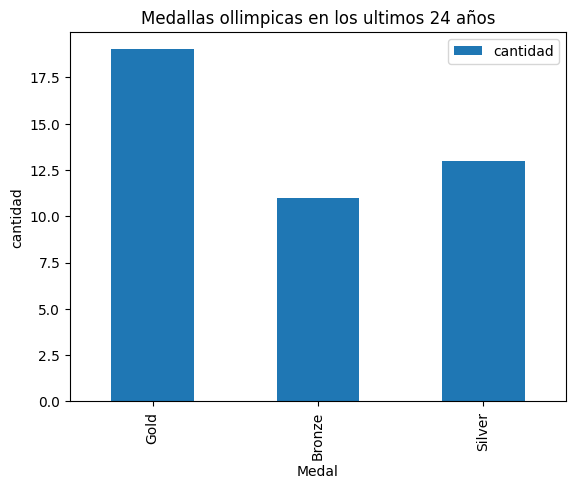

In [88]:
query = "SELECT Medal, COUNT(*) AS cantidad FROM atletas WHERE Team = 'Mexico' AND Year >= 2000 ANd Medal IS NOT NULL GROUP BY Medal;"
data_df = fetch_data(query)
plot_data(data_df)


Prodemos solicitar mas datos y graficalos. En este caso pedimos un data frame que contenga el sexo de la persona y la medalla que haya ganado. para despues gaficar una comparación entre hombres y mujere que han ganado medallas en los juegos olimpicos.

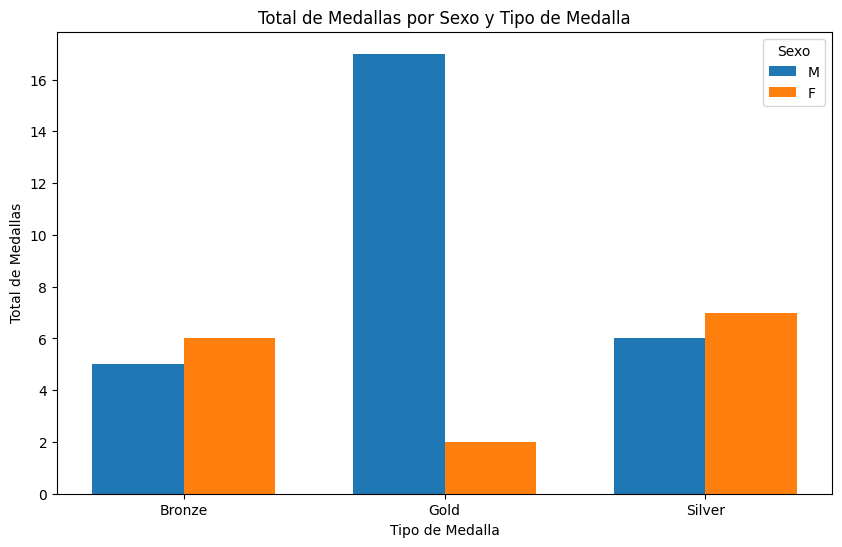

In [89]:
query = "SELECT Sex, Medal, COUNT(*) AS Total_Medallas FROM atletas WHERE Team = 'Mexico' AND Year >= 2000 ANd Medal IS NOT NULL  GROUP BY  Sex, Medal;"
data_medal = fetch_data(query)
# Pivotar el DataFrame para tener 'Medal' como índice y 'Sex' como columnas
pivot_df = data_medal.pivot(index='Medal', columns='Sex', values='Total_Medallas').fillna(0)

# Crear un gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Definir el ancho de las barras
bar_width = 0.35

# Posiciones de las barras en el eje x
index = np.arange(len(pivot_df))

# Crear las barras
bars1 = ax.bar(index, pivot_df['M'], bar_width, label='M')
bars2 = ax.bar(index + bar_width, pivot_df['F'], bar_width, label='F')

# Agregar etiquetas y título
ax.set_xlabel('Tipo de Medalla')
ax.set_ylabel('Total de Medallas')
ax.set_title('Total de Medallas por Sexo y Tipo de Medalla')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title='Sexo')

# Mostrar la gráfica
plt.show()

Por último, calculamos las medallass ganadas por año es las ultimas 5 competencias.

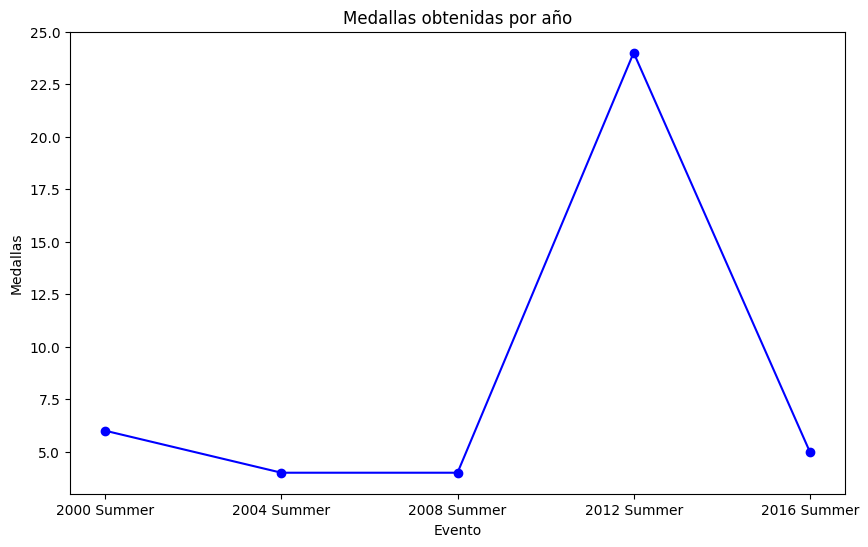

In [90]:
query = "SELECT Games, COUNT(*) AS cantidad FROM atletas WHERE Team = 'Mexico' AND Year >= 2000 ANd Medal IS NOT NULL GROUP BY Games ORDER BY Games ASC;"
data_anio = fetch_data(query)
plt.figure(figsize=(10, 6))
plt.plot(data_anio['Games'], data_anio['cantidad'], marker='o', linestyle='-', color='b')

# Agregar títulos y etiquetas
plt.title('Medallas obtenidas por año')
plt.xlabel('Evento')
plt.ylabel('Medallas')
plt.show()

Aun queda mucho trabajo por hacer, pero con esta información podemos ver como le ha ido a México en las últimas olimpiadas. El 2012 fue el año en el que le fue México en las olimpidas  con una cantidad de 24 medallas ganadas, espermos que el renimiento de México siga mejorando con el paso de tiempo.